# Netflix Data Analysis Pipeline
## Overview
This data pipeline analyzes the Netflix dataset to identify the most popular genres for TV shows and movies. It utilizes Python libraries such as Pandas, Seaborn, and Matplotlib to load, clean, analyze, and visualize the data.

## Steps:
1. Load the Dataset: The Netflix dataset is loaded into a Pandas DataFrame. Unnecessary columns such as 'date_added', 'cast', 'director', 'duration', 'description', and 'listed_in' are dropped.

2. Handle Missing Values: Any missing values in the dataset are filled with "Unknown".

3. Preprocess Genre Information: The 'listed_in' column, containing genre information, is split into separate columns for each genre. The resulting DataFrame is concatenated with the original one.

4. Split Data into TV Shows and Movies: The dataset is divided into two separate DataFrames: one for TV shows and one for movies.

5. Analyze TV Shows and Movies: For both TV shows and movies, the pipeline calculates the frequency of each genre.

6. Visualize the Results: The top 10 most popular genres for TV shows and movies are visualized using Seaborn barplots.

## Libraries Used:
* Pandas: For data manipulation and analysis.
* Seaborn: For statistical data visualization.
* Matplotlib: For creating static, animated, and interactive visualizations in Python.
## Conclusion
This pipeline provides insights into the popularity of genres for TV shows and movies on Netflix. The visualizations generated help in understanding the distribution of genres and their popularity trends.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Source data = https://www.kaggle.com/datasets/arnavvvvv/netflix-movies-and-tv-shows
netflix_data = pd.read_csv("netflix_titles.csv")

In [2]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
missing_values = netflix_data.isnull().sum
print(missing_values)

<bound method NDFrame._add_numeric_operations.<locals>.sum of       show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      Fals

In [6]:
#Fill in any missing values with "Unknown"
netflix_data.fillna("Unknown", inplace=True)

In [7]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
# Split the 'listed_in' column by commas and expand into separate columns
genres = netflix_data['listed_in'].str.split(', ', expand=True)
# Rename the new columns for clarity
genres.columns = [f'genre_{i+1}' for i in range(genres.shape[1])]
# Concatenate the genre columns with the original DataFrame
netflix_data = pd.concat([netflix_data, genres], axis=1)

In [9]:
# Drop unnecessary columns
columns_drop = ["date_added", "cast", "director","duration", "description", "listed_in"]
netflix_data = netflix_data.drop(columns=columns_drop)
netflix_data

,show_id,type,title,country,release_year,rating,genre_1,genre_2,genre_3
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,Documentaries,None,None
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Unknown,2021,TV-MA,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,Unknown,2021,TV-MA,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,India,2021,TV-MA,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2007,R,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,Unknown,2018,TV-Y7,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,United States,2009,R,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,United States,2006,PG,Children & Family Movies,Comedies,None


In [10]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'country', 'release_year', 'rating',
       'genre_1', 'genre_2', 'genre_3'],
      dtype='object')

In [11]:
# Handle missing values
netflix_data.dropna(inplace=True)
# Preprocess genre columns
netflix_data['genres'] = netflix_data[['genre_1', 'genre_2', 'genre_3']].apply(lambda x: '|'.join(x.dropna()), axis=1)

In [12]:
Duplicates = netflix_data.duplicated().sum()
print("Number of duplicated rows: ", Duplicates)

Number of duplicated rows:  0


In [13]:
# Two different types of data
print(netflix_data['type'].unique())

['TV Show' 'Movie']


In [14]:
# Split the dataset into TV shows and movies
tv_shows_df = netflix_data[netflix_data['type'] == 'TV Show']
movies_df = netflix_data[netflix_data['type'] == 'Movie']

In [15]:
tv_popular_genre = tv_shows_df.groupby(['country'])['genres'].apply(lambda x: x.str.split('|').explode()).value_counts().reset_index(name='count')
tv_popular_genre

,index,count
0,International TV Shows,1026
1,TV Dramas,527
2,Crime TV Shows,396
3,Romantic TV Shows,340
4,TV Comedies,284
5,British TV Shows,201
6,Spanish-Language TV Shows,164
7,Docuseries,149
8,TV Action & Adventure,148
9,Korean TV Shows,132


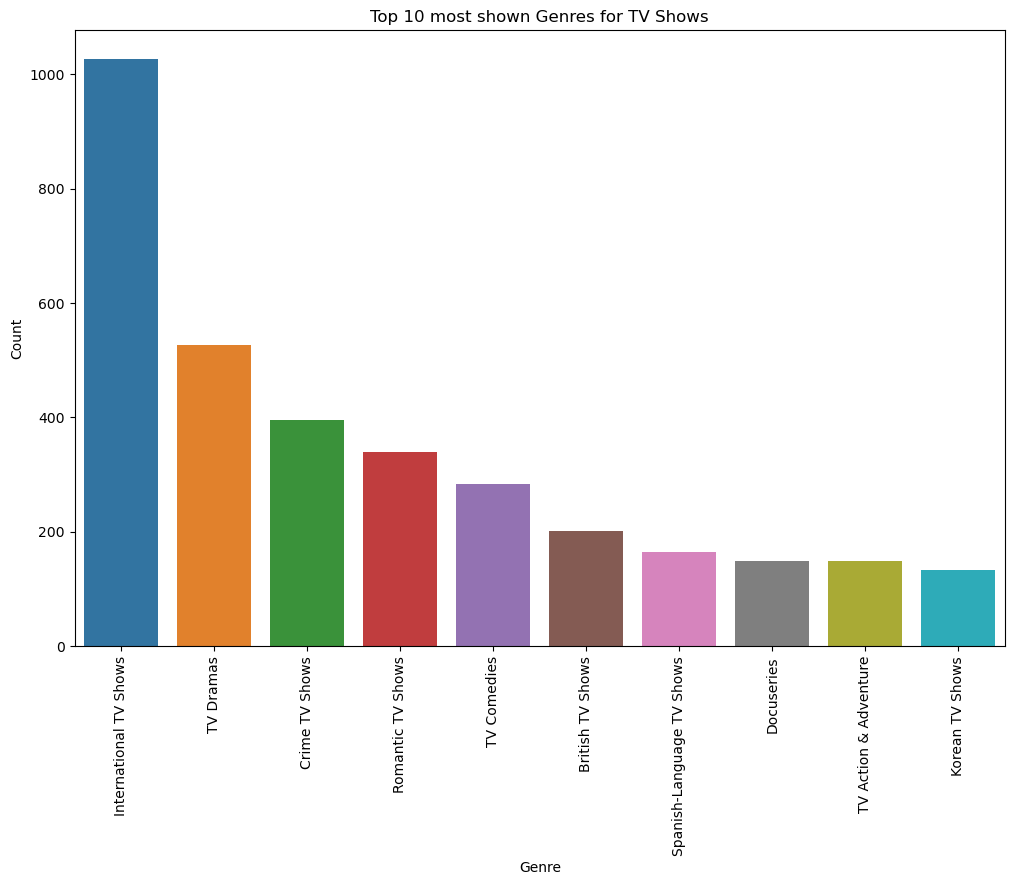

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='count', data=tv_popular_genre.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 most shown Genres for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [17]:
movies_popular_genre = movies_df.groupby(['country'])['genres'].apply(lambda x: x.str.split('|').explode()).value_counts().reset_index(name='count')
movies_popular_genre

,index,count
0,International Movies,1764
1,Dramas,1532
2,Comedies,956
3,Independent Movies,592
4,Romantic Movies,458
5,Action & Adventure,452
6,Thrillers,280
7,Music & Musicals,228
8,Sci-Fi & Fantasy,143
9,Horror Movies,142


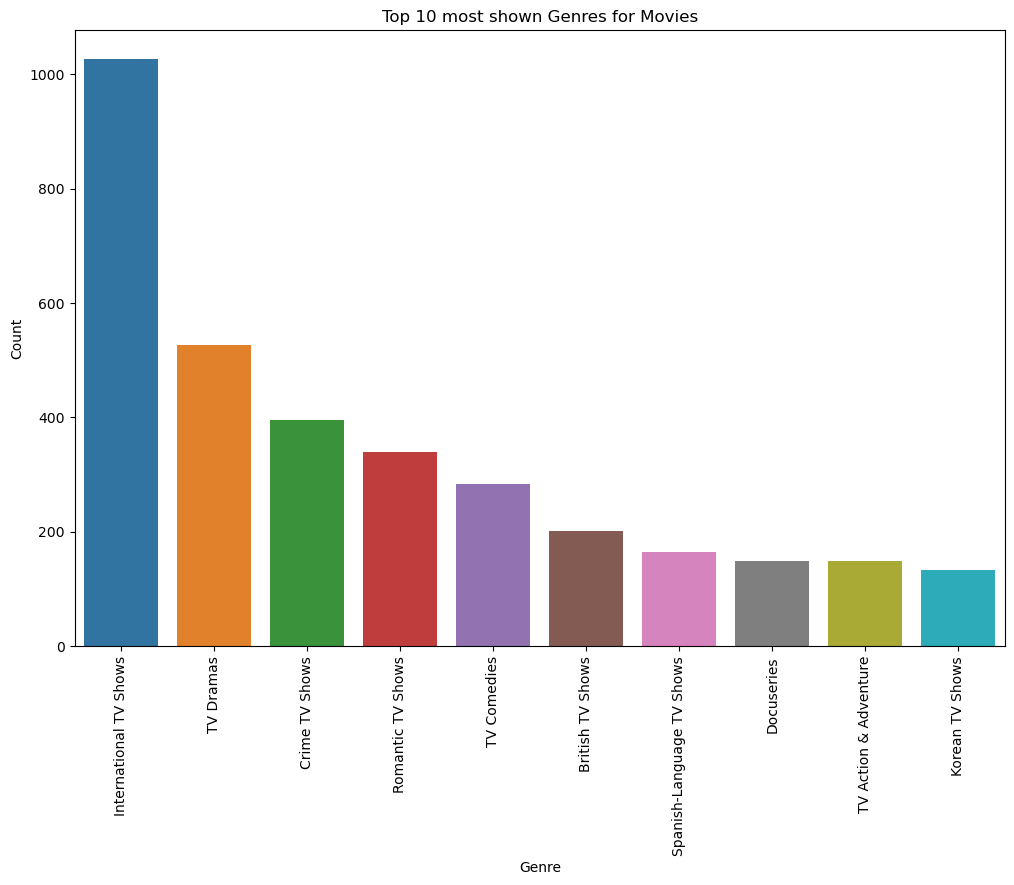

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='count', data=tv_popular_genre.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 most shown Genres for Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()